# Scapy: Processing network packets in Python
Scapy is a python package for dissecting and implementing network protocols.  Full documentation is here:
http://www.secdev.org/projects/scapy/doc/

In [1]:
from scapy.all import *
# Add MQTTSN support
exec(open("MQTTSN.py").read())

Scapy can sniff packets off the wire and process and display them.  In this case we focus only on UDP packets.  (The filter is a string in the Berkeley packet filter style: http://biot.com/capstats/bpf.html.)  The nsummary method prints a summary of each packet, along with its index in the collection.

In [2]:
a=sniff(iface="br0", filter="udp or arp")
#a.nsummary()

If you execute the previous code on a busy network, you'll probably see lots of packets which are not MQTTSN packets.  The following code separates the MQTTSN packets from the other 'uninteresting' packets.  In this code x[MQTTSN] returns the first MQTTSN header and the .payload field returns the rest of the packet, which depends on the particular type of MQTTSN packet.  In this case, if you managed to sniff some MQTTSN packets, you might see something like:

```[<MQTTSN_CONNECT  dup=0 qos=0 retain=0 will=0 clean=1 topicIDtype=0 protocol=1 duration=30 client='client-temp-accelerator4' |>,
 <MQTTSN_CONNACK  returnCode=0 |>,```
 
These packets represent a connect request followed by an acknowledgement.

In [3]:
packets = [x[MQTTSN].payload for x in a if MQTTSN in x]
times = [x.time*1000000 for x in a if MQTTSN in x]
start = times[0]
offsettimes = [(x.time*1000000-start) for x in a if MQTTSN in x]
packets

IndexError: list index out of range

11 values bigger than 200


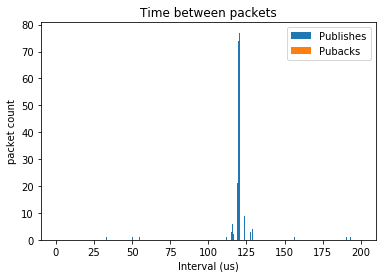

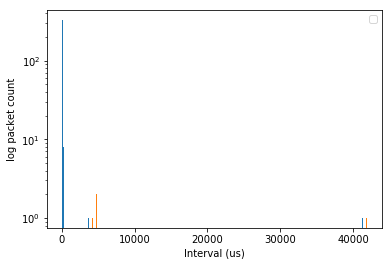

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py

def find_intervals(times):
    intervals = []
    lasttime = None
    for time in times:
        if(lasttime):
            intervals.append(time-lasttime);
        lasttime = time
    return intervals

maxrange = 200
t = range(0,len(offsettimes))
publishes = [offsettimes[i] for i in t if MQTTSN_PUBLISH in packets[i]]
pubacks = [offsettimes[i] for i in t if MQTTSN_PUBACK in packets[i]]
publish_intervals = find_intervals(publishes)
puback_intervals = find_intervals(pubacks)

outofrangecount = len([x for x in publish_intervals if x > maxrange])
print(str(outofrangecount) + " values bigger than " + str(maxrange))
plt.hist([publish_intervals, puback_intervals],bins=256, range = (0.0, maxrange))
plt.title('Time between packets')
plt.xlabel('Interval (us)')
plt.ylabel('packet count')
plt.legend(['Publishes','Pubacks'])
plt.show()
plt.xlabel('Interval (us)')
plt.ylabel('log packet count')
plt.legend(['Publishes','Pubacks'])
plt.hist([publish_intervals, puback_intervals],log=True,bins=256)
plt.show()




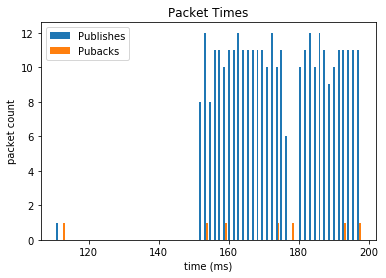

In [56]:
import matplotlib.pyplot as plt
import numpy as np

t = range(0,len(offsettimes))
publishes = [offsettimes[i]/1000 for i in t if MQTTSN_PUBLISH in packets[i]]
pubacks = [offsettimes[i]/1000 for i in t if MQTTSN_PUBACK in packets[i]]
plt.hist([publishes,pubacks],bins=64)
plt.legend(['Publishes','Pubacks'])
plt.title('Packet Times')
plt.xlabel('time (ms)')
plt.ylabel('packet count')
plt.show()

In [ ]:
[x.dst for x in a]

In [ ]:
x = Ether(b'\xff\xff\xff\xff\xff\xff\xf2\x8b\xc00w\xa9\x08\x00E\x00\x01\x16\x06\xde@\x00@\x11\xae\x95\xc0\xa8\x01\x14\xc0\xa8\x01\xff\x05\xfe\x05\xfe\x01\x023\xe4TCF2\x02\x00\x00\x00ID=TCP:192.168.1.20:1534\x00Name=TCF Agent\x00OSName=Linux 4.6.0-xilinx-27952-g6290416\x00UserName=root\x00AgentID=1e822c19-0d60-4a21-97cd-9376a5e69a7a\x00TransportName=TCP\x00ServiceManagerID=1e822c19-0d60-4a21-97cd-9376a5e69a7a-0\x00Port=1534\x00Host=192.168.1.20\x00')
print(x.summary())
print("foo",x)
print(x)